Eksik veri sayısı: 0
En Güçlü 10 Kahraman:
hero_names
Spectre              49
Amazo                44
Martian Manhunter    35
Living Tribunal      35
Man of Miracles      34
Captain Marvel       33
T-X                  33
Galactus             32
T-1000               32
One-Above-All        31
Name: Total_Powers, dtype: int64


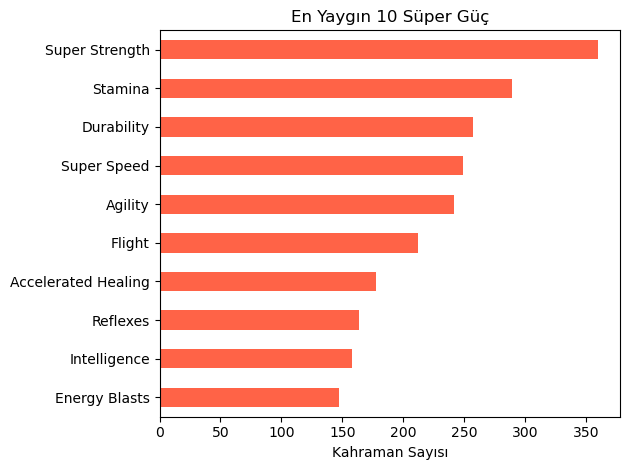

Ortalama Güç: 0.05
Standart Sapma: 0.22
Universe
Other     661
DC          3
Marvel      3
Name: count, dtype: int64


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 📥 1. Veriyi Yükle
df = pd.read_csv("super_hero_powers.csv")

# 🧹 2. Ön işleme
df.set_index("hero_names", inplace=True)

# Eksik veri kontrolü
print("Eksik veri sayısı:", df.isnull().sum().sum())

# Her kahraman için toplam kaç güce sahip olduğu
df["Total_Powers"] = df.sum(axis=1)

# 💥 3. En Güçlü 10 Kahraman
print("En Güçlü 10 Kahraman:")
print(df["Total_Powers"].sort_values(ascending=False).head(10))

# 📊 4. En Yaygın 10 Süper Güç
top_powers = df.drop(columns="Total_Powers").sum().sort_values(ascending=False).head(10)
top_powers.plot(kind="barh", color="tomato")
plt.title("En Yaygın 10 Süper Güç")
plt.xlabel("Kahraman Sayısı")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# 🧠 5. NumPy ile Genel Güç Analizi
powers_array = df.drop(columns="Total_Powers").values
mean_power = np.mean(powers_array)
std_power = np.std(powers_array)

print("Ortalama Güç:", round(mean_power, 2))
print("Standart Sapma:", round(std_power, 2))

# ⚔️ 6. Universe Kolonu Oluştur ve DC vs Marvel Güç Karşılaştırması
def assign_universe(hero_name):
    dc_heroes = ["Batman", "Superman", "Wonder Woman"]  # Örnek DC kahramanları
    marvel_heroes = ["Spider-Man", "Iron Man", "Thor"]  # Örnek Marvel kahramanları
    
    if hero_name in dc_heroes:
        return "DC"
    elif hero_name in marvel_heroes:
        return "Marvel"
    else:
        return "Other"

df["Universe"] = df.index.to_series().apply(assign_universe)

# Universe sütunundaki dağılımı göster
print(df["Universe"].value_counts())
